Manav

## Introduction

In this task we need to build a MLP on MNIST dataset. Its a large dataset. The “vanilla” model is then compared with a model using drop-out to see if there is any improvement in the model.

We then compare the accuracy of the model and finalize the best model with higher accuracy rate. 

In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing the MNIST dataset 
from keras.datasets import mnist
mnist = mnist.load_data()

C:\Users\Lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#Dividing dataset into test and train set 
(X_train, y_train), (X_test, y_test) = mnist

In [4]:
# Random Seeding 
np.random.RandomState(seed=0)

In [5]:
#Reshaping the train and test set also converting them to float type and grayscale
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255

print (X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


## Modelling without dropout 

In [7]:
#Importing Keras library
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


In [8]:
#Defining function for modelling using sequential interface of keras without drpout 
def modeling(optimizer='adam', hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_shape=[784,]),
        Activation('relu'),
        Dense(hidden_size),
        Activation('tanh'),
        Dense(10),
        Activation('softmax')
    ])
        
    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
#Modelling without dropout 
from keras.wrappers.scikit_learn import KerasClassifier

clf = KerasClassifier(modeling)

In [11]:
#Gridsearch to find the best parameters for model without dropout 
from sklearn.model_selection import GridSearchCV
param_grid = {'epochs' : [1, 3, 5],
              'hidden_size':  [10, 32, 64]}

grid = GridSearchCV(clf, param_grid = param_grid, cv = 5)
grid.fit(X_train, y_train)

print(grid.best_params_)

Epoch 1/1
48000/48000 [==============================] - 1s 22us/step
Epoch 1/1
48000/48000 [==============================] - 1s 23us/step
Epoch 1/1
48000/48000 [==============================] - 1s 26us/step
Epoch 1/1
48000/48000 [==============================] - 1s 26us/step
Epoch 1/1
48000/48000 [==============================] - 1s 19us/step
Epoch 1/1
48000/48000 [==============================] - 1s 27us/step
Epoch 1/1
48000/48000 [==============================] - 1s 23us/step
Epoch 1/1
48000/48000 [==============================] - 2s 32us/step
Epoch 1/1
48000/48000 [==============================] - 1s 23us/step
Epoch 1/1
48000/48000 [==============================] - 1s 31us/step
Epoch 1/1
48000/48000 [==============================] - 2s 38us/step
Epoch 1/1
48000/48000 [==============================] - 3s 60us/step
Epoch 1/1
48000/48000 [==============================] - 1s 31us/step
Epoch 1/1
48000/48000 [==============================] - 1s 28us/step
Epoch 1/1
48000/4800

48000/48000 [==============================] - 2s 48us/step
Epoch 1/5
48000/48000 [==============================] - 8s 164us/step - loss: 0.2930 - acc: 0.9156
Epoch 2/5
48000/48000 [==============================] - 5s 108us/step - loss: 0.1254 - acc: 0.9620
Epoch 3/5
48000/48000 [==============================] - 5s 108us/step - loss: 0.0875 - acc: 0.9738
Epoch 4/5
48000/48000 [==============================] - 6s 119us/step - loss: 0.0673 - acc: 0.9792
Epoch 5/5
48000/48000 [==============================] - 2s 48us/step
Epoch 1/5
48000/48000 [==============================] - 8s 161us/step - loss: 0.2772 - acc: 0.9210
Epoch 2/5
48000/48000 [==============================] - 6s 116us/step - loss: 0.1201 - acc: 0.9631
Epoch 3/5
48000/48000 [==============================] - 6s 119us/step - loss: 0.0856 - acc: 0.9740
Epoch 4/5
48000/48000 [==============================] - 6s 123us/step - loss: 0.0679 - acc: 0.9785
Epoch 5/5
48000/48000 [==============================] - 2s 49us/step


In [12]:
#To find the mean train and test score with different parameters in the model
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs", "param_hidden_size"],
                values=['mean_train_score', "mean_test_score"])


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\

mean_test_score  mean_train_score
param_epochs param_hidden_size                                   
1            10                        0.896100          0.903425
             32                        0.938233          0.945708
             64                        0.949733          0.957883
3            10                        0.913267          0.923233
             32                        0.955450          0.968633
             64                        0.967050          0.980513
5            10                        0.922083          0.935546
             32                        0.961183          0.978237
             64                        0.967567          0.986092

## Modelling wih dropout 

In [13]:
#Defining function for modelling with different hidden size and a dropout rate
def modeling(optimizer='adam', hidden_size=64, dropout=0.5):
    model = Sequential([
        Dense(hidden_size, input_shape=[784,]),
        Activation('relu'),
        Dropout(rate = dropout),
        Dense(hidden_size),
        Activation('relu'),
        Dropout(rate = dropout),
        Dense(10),
        Activation('softmax')
    ])
        
    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
# Modelling with dropout  
clf = KerasClassifier(modeling)

In [16]:
#Gridsearch to tune the parameters further for the new model  
param_grid = {'epochs' : [5],
              'dropout' : [0.1, 0.2, 0.3]}

grid = GridSearchCV(clf, param_grid = param_grid, cv = 5)
grid.fit(X_train, y_train)

print(grid.best_params_)


Epoch 1/5
48000/48000 [==============================] - 9s 194us/step - loss: 0.3772 - acc: 0.8882
Epoch 2/5
48000/48000 [==============================] - 8s 158us/step - loss: 0.1826 - acc: 0.9449
Epoch 3/5
48000/48000 [==============================] - 7s 143us/step - loss: 0.1414 - acc: 0.9565
Epoch 4/5
48000/48000 [==============================] - 8s 157us/step - loss: 0.1189 - acc: 0.9626
Epoch 5/5
48000/48000 [==============================] - 3s 69us/step
Epoch 1/5
48000/48000 [==============================] - 8s 175us/step - loss: 0.3642 - acc: 0.8904
Epoch 2/5
48000/48000 [==============================] - 7s 146us/step - loss: 0.1768 - acc: 0.9471
Epoch 3/5
48000/48000 [==============================] - 6s 133us/step - loss: 0.1407 - acc: 0.9560
Epoch 4/5
48000/48000 [==============================] - 7s 139us/step - loss: 0.1159 - acc: 0.9648
Epoch 5/5
48000/48000 [==============================] - 3s 60us/step
Epoch 1/5
48000/48000 [==============================] - 9s 

In [17]:
#To find the mean train and test score with different parameters in the new model
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs", "param_dropout"],
                values=['mean_train_score', "mean_test_score"])

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\

mean_test_score  mean_train_score
param_epochs param_dropout                                   
5            0.1                   0.969550          0.982592
             0.2                   0.968300          0.980638
             0.3                   0.962417          0.973829

## Final Modelling with tuned parameters 

In [18]:
#One hot encoding to create a dummy variable 
num_classes = 10
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print(y_train.shape, X_train.shape)

(60000, 10) (60000, 784)


In [19]:
#Defining the final model with dropout 
model_do = Sequential([
    Dense(64, input_shape=[784,]),
    Activation('relu'),
    Dropout(rate = 0.2),
    Dense(64),
    Activation('relu'),
    Dropout(rate = 0.2),
    Dense(10),
    Activation('softmax')
    ])

model_do.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [20]:
#Fitting the tuned dropout model on the train set 
callback_do = model_do.fit(X_train, y_train, epochs=100, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 13s 234us/step - loss: 0.4261 - acc: 0.8702 - val_loss: 0.1460 - val_acc: 0.9550
Epoch 2/100
54000/54000 [==============================] - 9s 167us/step - loss: 0.2124 - acc: 0.9367 - val_loss: 0.1130 - val_acc: 0.9672
Epoch 3/100
54000/54000 [==============================] - 10s 177us/step - loss: 0.1730 - acc: 0.9479 - val_loss: 0.0955 - val_acc: 0.9718
Epoch 4/100
54000/54000 [==============================] - 10s 177us/step - loss: 0.1517 - acc: 0.9540 - val_loss: 0.0955 - val_acc: 0.9728
Epoch 5/100
54000/54000 [==============================] - 9s 167us/step - loss: 0.1377 - acc: 0.9581 - val_loss: 0.0928 - val_acc: 0.9743
Epoch 6/100
54000/54000 [==============================] - 10s 178us/step - loss: 0.1256 - acc: 0.9612 - val_loss: 0.0806 - val_acc: 0.9775
Epoch 7/100
54000/54000 [==============================] - 9s 168us/step - loss: 0.1171 - acc: 0.9636 - val_loss:

Epoch 59/100
54000/54000 [==============================] - 9s 165us/step - loss: 0.0489 - acc: 0.9842 - val_loss: 0.0844 - val_acc: 0.9775
Epoch 60/100
54000/54000 [==============================] - 10s 176us/step - loss: 0.0520 - acc: 0.9838 - val_loss: 0.0869 - val_acc: 0.9780
Epoch 61/100
54000/54000 [==============================] - 9s 166us/step - loss: 0.0520 - acc: 0.9837 - val_loss: 0.0879 - val_acc: 0.9767
Epoch 62/100
54000/54000 [==============================] - 9s 176us/step - loss: 0.0495 - acc: 0.9834 - val_loss: 0.0854 - val_acc: 0.9782
Epoch 63/100
54000/54000 [==============================] - 9s 172us/step - loss: 0.0501 - acc: 0.9841 - val_loss: 0.0932 - val_acc: 0.9787
Epoch 64/100
54000/54000 [==============================] - 9s 171us/step - loss: 0.0500 - acc: 0.9843 - val_loss: 0.0990 - val_acc: 0.9787
Epoch 65/100
54000/54000 [==============================] - 10s 176us/step - loss: 0.0498 - acc: 0.9842 - val_loss: 0.0861 - val_acc: 0.9798
Epoch 66/100
54000

In [21]:
#Defining the final model with no dropout 
model_nodo = Sequential([
    Dense(64, input_shape=[784,]),                                                                                      
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
    ])

model_nodo.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [22]:
#Fitting the no dropout model on the train set 
callback_nodo = model_nodo.fit(X_train, y_train, epochs=100, validation_split=.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 12s 226us/step - loss: 0.3011 - acc: 0.9119 - val_loss: 0.1644 - val_acc: 0.9527
Epoch 2/100
54000/54000 [==============================] - 10s 182us/step - loss: 0.1353 - acc: 0.9594 - val_loss: 0.1162 - val_acc: 0.9658
Epoch 3/100
54000/54000 [==============================] - 9s 171us/step - loss: 0.0965 - acc: 0.9699 - val_loss: 0.1081 - val_acc: 0.9683
Epoch 4/100
54000/54000 [==============================] - 10s 181us/step - loss: 0.0783 - acc: 0.9758 - val_loss: 0.1005 - val_acc: 0.9697
Epoch 5/100
54000/54000 [==============================] - 9s 175us/step - loss: 0.0634 - acc: 0.9800 - val_loss: 0.0843 - val_acc: 0.9743
Epoch 6/100
54000/54000 [==============================] - 10s 178us/step - loss: 0.0513 - acc: 0.9836 - val_loss: 0.0947 - val_acc: 0.9747
Epoch 7/100
54000/54000 [==============================] - 10s 183us/step - loss: 0.0445 - acc: 0.9856 - val_loss

## Evaluating the final models 

In [23]:
#Evaluating the nodropout model on the test set 
score = model_nodo.evaluate(X_test, y_test, batch_size=3, verbose=0)

print("\nTest loss for No Dropout: {:.3f}".format(score[0]))
print("Test Accuracy for No Dropout: {:.3f}".format(score[1]))


Test loss for No Dropout: 0.203
Test Accuracy for No Dropout: 0.979


In [24]:
#Evaluating the dropout model on the test set 
score = model_do.evaluate(X_test, y_test, batch_size=3, verbose=0)

print("\nTest loss for Dropout: {:.3f}".format(score[0]))
print("Test Accuracy for Dropout: {:.3f}".format(score[1]))


Test loss for Dropout: 0.122
Test Accuracy for Dropout: 0.975


In [25]:
#Visualization function 
def plot_history(logger, title):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")
    plt.title(title)
    plt.show()

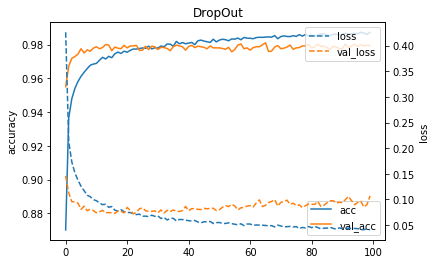

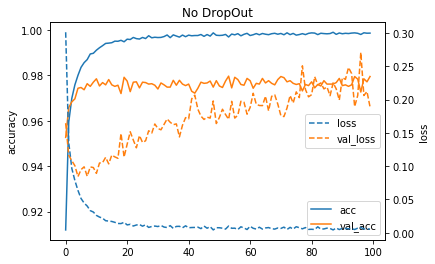

In [26]:
#Accuracy and loss v/s epochs on dropout and nodropout model 
plot_history(callback_do, title='DropOut')
plot_history(callback_nodo, title = 'No DropOut')